In [1]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from deep_macrofin import PDEModelTimeStep
from deep_macrofin import ActivationType, OptimizerType, SamplingMethod, plot_loss_df, set_seeds

In [2]:
latex_var_map = {
    r"\gamma": "gamma",
    r"\rho": "rho",
    r"\mu^{y_1}": "mu_y1",
    r"\mu^{y_2}": "mu_y2",
    r"\mu^{y_3}": "mu_y3",
    r"\sigma^{y_1}": "sig_y1",
    r"\sigma^{y_2}": "sig_y2",
    r"\sigma^{y_3}": "sig_y3",

    r"\mu^{z_1}": "muz1",
    r"\sigma^{z_1}": "sigz1",
    r"\mu_a^{z_1}": "muz1_ari",
    r"\sigma_a^{z_1}": "sigz1_ari",
    r"\mu^{z_2}": "muz2",
    r"\sigma^{z_2}": "sigz2",
    r"\mu_a^{z_2}": "muz2_ari",
    r"\sigma_a^{z_2}": "sigz2_ari",
    r"\mu^{z_3}": "muz3",
    r"\sigma^{z_3}": "sigz3",
    r"\mu_a^{z_3}": "muz3_ari",
    r"\sigma_a^{z_3}": "sigz3_ari",

    r"\mu^{q_1}": "mu_q1",
    r"\mu^{q_2}": "mu_q2",
    r"\mu^{q_3}": "mu_q3",
    r"\sigma^{q_1}": "sig_q1",
    r"\sigma^{q_2}": "sig_q2",
    r"\sigma^{q_3}": "sig_q3",
    r"\zeta^1": "zeta1",
    r"\zeta^2": "zeta2",
    r"\zeta^3": "zeta3",
    r"\mu^{k_1}": "mu_k1",
    r"\mu^{k_2}": "mu_k2",
    r"\mu^{k_3}": "mu_k3",
    r"\sigma^{k_1}": "sig_k1",
    r"\sigma^{k_2}": "sig_k2",
    r"\sigma^{k_3}": "sig_k3",

    r"k_1": "k1",
    r"k_2": "k2",
    r"k_3": "k3",
    r"q_1": "q1",
    r"q_2": "q2",
    r"q_3": "q3",
    r"z_1": "z1",
    r"z_2": "z2",
    r"z_l": "zl",
}

params = {
    "gamma": 5,
    "rho": 0.05,
    "mu_y1": 0.02,
    "sig_y1": 0.02,
    "mu_y2": 0.05,
    "sig_y2": 0.05,
    "mu_y3": 0.08,
    "sig_y3": 0.08
}

base_model_dir ="./models/tree_3_ts"

=============================Summary of Model tree3=============================
Config: {
 "batch_size": 500,
 "num_outer_iterations": 10,
 "num_inner_iterations": 1000,
 "lr": 0.0005,
 "loss_log_interval": 100,
 "optimizer_type": "Adam",
 "min_t": 0.0,
 "max_t": 1.0,
 "outer_loop_convergence_thres": 0.0001,
 "sampling_method": "UniformRandom",
 "time_batch_size": -1
}
Latex Variable Mapping:
{
 "\\gamma": "gamma",
 "\\rho": "rho",
 "\\mu^{y_1}": "mu_y1",
 "\\mu^{y_2}": "mu_y2",
 "\\mu^{y_3}": "mu_y3",
 "\\sigma^{y_1}": "sig_y1",
 "\\sigma^{y_2}": "sig_y2",
 "\\sigma^{y_3}": "sig_y3",
 "\\mu^{z_1}": "muz1",
 "\\sigma^{z_1}": "sigz1",
 "\\mu_a^{z_1}": "muz1_ari",
 "\\sigma_a^{z_1}": "sigz1_ari",
 "\\mu^{z_2}": "muz2",
 "\\sigma^{z_2}": "sigz2",
 "\\mu_a^{z_2}": "muz2_ari",
 "\\sigma_a^{z_2}": "sigz2_ari",
 "\\mu^{z_3}": "muz3",
 "\\sigma^{z_3}": "sigz3",
 "\\mu_a^{z_3}": "muz3_ari",
 "\\sigma_a^{z_3}": "sigz3_ari",
 "\\mu^{q_1}": "mu_q1",
 "\\mu^{q_2}": "mu_q2",
 "\\mu^{q_3}": "mu_q3",

Total loss: 0.0000: 100%|██████████| 1000/1000 [06:14<00:00,  2.67it/s]


Model loaded
k1: Mean Value: 1.00005, Absolute Change: 0.00141, Relative Change:  0.00141
k2: Mean Value: 1.00005, Absolute Change: 0.00141, Relative Change:  0.00141
k3: Mean Value: 1.00005, Absolute Change: 0.00141, Relative Change:  0.00141
Updating min loss from inf to 0.0000
Outer Loop 0 Finished in 374.5110s. Loading best model...


Total loss: 0.0000: 100%|██████████| 707/707 [04:28<00:00,  2.64it/s]


Model loaded
k1: Mean Value: 1.00008, Absolute Change: 0.00006, Relative Change:  0.00006
k2: Mean Value: 1.00008, Absolute Change: 0.00006, Relative Change:  0.00006
k3: Mean Value: 1.00008, Absolute Change: 0.00006, Relative Change:  0.00006
Updating min loss from 0.0000 to 0.0000
Outer Loop 1 Finished in 268.2903s. Loading best model...
training finished, total time :: 644.6758801937103
Best model saved to ./models/tree_3_ts/model_best.pt if valid
Model saved to ./models/tree_3_ts/model.pt
Model loaded
===================================Evaluating===================================
loss :: hjbeq_1: 0.0000,
hjbeq_2: 0.0000,
hjbeq_3: 0.0000,
hjbeq_4: 0.0000,
hjbeq_5: 0.0000,
hjbeq_6: 0.0000,
endogvar_k1_cond_time_boundary: 0.0000,
endogvar_k2_cond_time_boundary: 0.0000,
endogvar_k3_cond_time_boundary: 0.0000,
total_loss: 0.0000


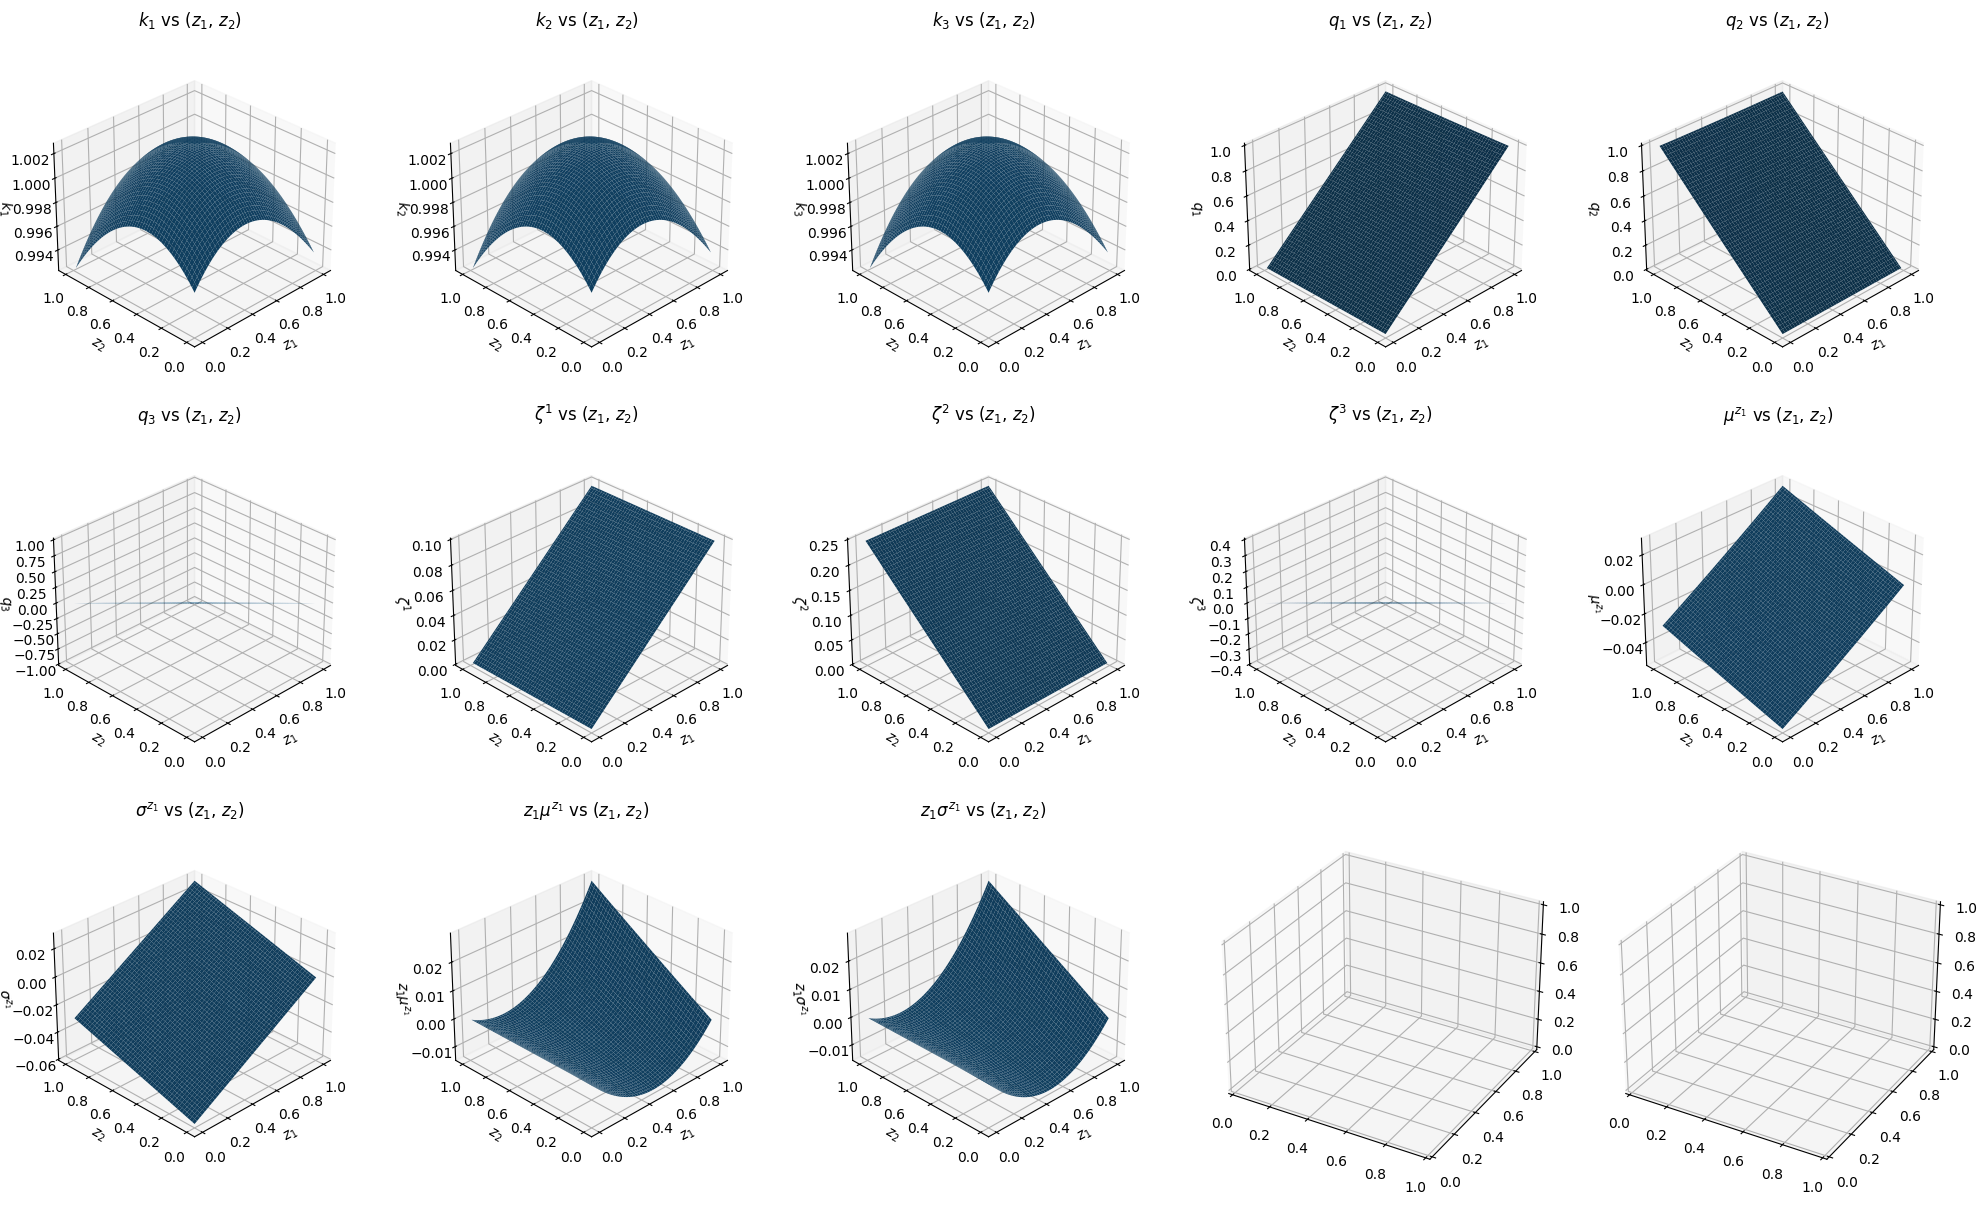

In [3]:
set_seeds(42)
model = PDEModelTimeStep("tree3", 
                 config={"batch_size": 500, "time_batch_size": -1,
                         "sampling_method": SamplingMethod.UniformRandom,
                         "num_outer_iterations": 10,
                         "num_inner_iterations": 1000,
                         "lr": 0.0005, 
                         "optimizer_type": OptimizerType.Adam}, 
                 latex_var_mapping=latex_var_map)
model.set_state(["z1", "z2"], {"z1": [0.01, 0.99], "z2": [0.01, 0.99]})
model.add_params(params)
model.add_endogs(["k1", "k2", "k3"], configs={
    "k1": {"positive": True, "hidden_units": [80] * 4},
    "k2": {"positive": True, "hidden_units": [80] * 4},
    "k3": {"positive": True, "hidden_units": [80] * 4},
})
model.endog_vars["k2"].load_state_dict(model.endog_vars["k1"].state_dict())
model.endog_vars["k3"].load_state_dict(model.endog_vars["k1"].state_dict())
model.add_equation(r"$z_l &= 1 - z_1 - z_2$")
model.add_equation(r"$q_1 &= \frac{z_1}{k_1}$")
model.add_equation(r"$q_2 &= \frac{z_2}{k_2}$")
model.add_equation(r"$q_3 &= \frac{z_l}{k_3}$")
model.add_equation("q1_z1=deriv(q1, SV)[:,:1]")
model.add_equation("q1_z2=deriv(q1, SV)[:,1:2]")
model.add_equation("q1_z1z1=deriv(q1_z1, SV)[:,:1]")
model.add_equation("q1_z1z2=deriv(q1_z1, SV)[:,1:2]")
model.add_equation("q1_z2z1=deriv(q1_z2, SV)[:,:1]")
model.add_equation("q1_z2z2=deriv(q1_z2, SV)[:,1:2]")
model.add_equation("q2_z1=deriv(q2, SV)[:,:1]")
model.add_equation("q2_z2=deriv(q2, SV)[:,1:2]")
model.add_equation("q2_z1z1=deriv(q2_z1, SV)[:,:1]")
model.add_equation("q2_z1z2=deriv(q2_z1, SV)[:,1:2]")
model.add_equation("q2_z2z1=deriv(q2_z2, SV)[:,:1]")
model.add_equation("q2_z2z2=deriv(q2_z2, SV)[:,1:2]")
model.add_equation("q3_z1=deriv(q3, SV)[:,:1]")
model.add_equation("q3_z2=deriv(q3, SV)[:,1:2]")
model.add_equation("q3_z1z1=deriv(q3_z1, SV)[:,:1]")
model.add_equation("q3_z1z2=deriv(q3_z1, SV)[:,1:2]")
model.add_equation("q3_z2z1=deriv(q3_z2, SV)[:,:1]")
model.add_equation("q3_z2z2=deriv(q3_z2, SV)[:,1:2]")

model.add_equation(r"$\mu^{z_1} &= \mu^{y_1} - (z_1 * \mu^{y_1} + z_2 * \mu^{y_2} + z_l * \mu^{y_3}) + (z_1 * \sigma^{y_1} + z_2 * \sigma^{y_2} + z_l * \sigma^{y_3}) * (z_1 * \sigma^{y_1} + z_2 * \sigma^{y_2} + z_l * \sigma^{y_3} - \sigma^{y_1})$")
model.add_equation(r"$\mu^{z_2} &= \mu^{y_2} - (z_1 * \mu^{y_1} + z_2 * \mu^{y_2} + z_l * \mu^{y_3}) + (z_1 * \sigma^{y_1} + z_2 * \sigma^{y_2} + z_l * \sigma^{y_3}) * (z_1 * \sigma^{y_1} + z_2 * \sigma^{y_2} + z_l * \sigma^{y_3} - \sigma^{y_2})$")
model.add_equation(r"$\sigma^{z_1} &= \sigma^{y_1} - (z_1 * \sigma^{y_1} + z_2 * \sigma^{y_2} + z_l * \sigma^{y_3})$")
model.add_equation(r"$\sigma^{z_2} &= \sigma^{y_2} - (z_1 * \sigma^{y_1} + z_2 * \sigma^{y_2} + z_l * \sigma^{y_3})$")

model.add_equation(r"$\mu_a^{z_1} &= \mu^{z_1} * z_1$")
model.add_equation(r"$\mu_a^{z_2} &= \mu^{z_2} * z_2$")
model.add_equation(r"$\sigma_a^{z_1} &= \sigma^{z_1} * z_1$")
model.add_equation(r"$\sigma_a^{z_2} &= \sigma^{z_2} * z_2$")
model.add_equation(r"$\mu_a^{z_3} &= -(\mu_a^{z_1} + \mu_a^{z_2})$")
model.add_equation(r"$\sigma_a^{z_3} &= -(\sigma_a^{z_1} + \sigma_a^{z_2})$")
model.add_equation(r"$\mu^{z_3} &= \frac{\mu_a^{z_3}}{z_l}$")
model.add_equation(r"$\sigma^{z_3} &= \frac{\sigma_a^{z_3}}{z_l}$")

model.add_equation(r"$\mu^{q_1} &= \frac{1}{q_1} * \left(\frac{\partial q_1}{\partial z_1} * \mu_a^{z_1} + \frac{\partial q_1}{\partial z_2} * \mu_a^{z_2} + \frac{1}{2} * \frac{\partial^2 q_1}{\partial z_1^2} * (\sigma_a^{z_1})^2 + \frac{1}{2} * \frac{\partial^2 q_1}{\partial z_2^2} * (\sigma_a^{z_2})^2 + \frac{\partial^2 q_1}{\partial z_1 \partial z_2} * \sigma_a^{z_1} * \sigma_a^{z_2}\right)$")
model.add_equation(r"$\mu^{q_2} &= \frac{1}{q_2} * \left(\frac{\partial q_2}{\partial z_1} * \mu_a^{z_1} + \frac{\partial q_2}{\partial z_2} * \mu_a^{z_2} + \frac{1}{2} * \frac{\partial^2 q_2}{\partial z_1^2} * (\sigma_a^{z_1})^2 + \frac{1}{2} * \frac{\partial^2 q_2}{\partial z_2^2} * (\sigma_a^{z_2})^2 + \frac{\partial^2 q_2}{\partial z_1 \partial z_2} * \sigma_a^{z_1} * \sigma_a^{z_2}\right)$")
model.add_equation(r"$\mu^{q_3} &= \frac{1}{q_3} * \left(\frac{\partial q_3}{\partial z_1} * \mu_a^{z_1} + \frac{\partial q_3}{\partial z_2} * \mu_a^{z_2} + \frac{1}{2} * \frac{\partial^2 q_3}{\partial z_1^2} * (\sigma_a^{z_1})^2 + \frac{1}{2} * \frac{\partial^2 q_3}{\partial z_2^2} * (\sigma_a^{z_2})^2 + \frac{\partial^2 q_3}{\partial z_1 \partial z_2} * \sigma_a^{z_1} * \sigma_a^{z_2}\right)$")

model.add_equation(r"$\sigma^{q_1} &= \frac{1}{q_1} * \left(\frac{\partial q_1}{\partial z_1} * \sigma_a^{z_1} + \frac{\partial q_1}{\partial z_2} * \sigma_a^{z_2} \right)$")
model.add_equation(r"$\sigma^{q_2} &= \frac{1}{q_2} * \left(\frac{\partial q_2}{\partial z_1} * \sigma_a^{z_1} + \frac{\partial q_2}{\partial z_2} * \sigma_a^{z_2} \right)$")
model.add_equation(r"$\sigma^{q_3} &= \frac{1}{q_3} * \left(\frac{\partial q_3}{\partial z_1} * \sigma_a^{z_1} + \frac{\partial q_3}{\partial z_2} * \sigma_a^{z_2} \right)$")

model.add_equation(r"$\zeta^1 &= \gamma * z_1 * \sigma^{y_1}$")
model.add_equation(r"$\zeta^2 &= \gamma * z_2 * \sigma^{y_2}$")
model.add_equation(r"$\zeta^3 &= \gamma * z_l * \sigma^{y_3}$")
model.add_equation(r"$\mu^{k_1} &= \mu^{z_1} - \mu^{q_1} + \sigma^{q_1} * (\sigma^{q_1} - \sigma^{z_1})$")
model.add_equation(r"$\mu^{k_2} &= \mu^{z_2} - \mu^{q_2} + \sigma^{q_2} * (\sigma^{q_2} - \sigma^{z_2})$")
model.add_equation(r"$\mu^{k_3} &= \mu^{z_3} - \mu^{q_3} + \sigma^{q_3} * (\sigma^{q_3} - \sigma^{z_3})$")
model.add_equation(r"$\sigma^{k_1} &= \sigma^{z_1} - \sigma^{q_1}$")
model.add_equation(r"$\sigma^{k_2} &= \sigma^{z_2} - \sigma^{q_2}$")
model.add_equation(r"$\sigma^{k_3} &= \sigma^{z_3} - \sigma^{q_3}$")

model.add_hjb_equation(r"$\frac{\partial k_1}{\partial t} + \frac{\partial k_1}{\partial z_1} * \mu_a^{z_1} + \frac{\partial k_1}{\partial z_2} * \mu_a^{z_2} + \frac{1}{2} * \frac{\partial^2 k_1}{\partial z_1^2} * (\sigma_a^{z_1})^2 + \frac{1}{2} * \frac{\partial^2 k_1}{\partial z_2^2} * (\sigma_a^{z_2})^2 + \frac{\partial^2 k_1}{\partial z_1 \partial z_2} * \sigma_a^{z_1} * \sigma_a^{z_2} - \mu^{k_1} * k_1$")
model.add_hjb_equation(r"$\frac{\partial k_2}{\partial t} + \frac{\partial k_2}{\partial z_1} * \mu_a^{z_1} + \frac{\partial k_2}{\partial z_2} * \mu_a^{z_2} + \frac{1}{2} * \frac{\partial^2 k_2}{\partial z_1^2} * (\sigma_a^{z_1})^2 + \frac{1}{2} * \frac{\partial^2 k_2}{\partial z_2^2} * (\sigma_a^{z_2})^2 + \frac{\partial^2 k_2}{\partial z_1 \partial z_2} * \sigma_a^{z_1} * \sigma_a^{z_2} - \mu^{k_2} * k_2$")
model.add_hjb_equation(r"$\frac{\partial k_3}{\partial t} + \frac{\partial k_3}{\partial z_1} * \mu_a^{z_1} + \frac{\partial k_3}{\partial z_2} * \mu_a^{z_2} + \frac{1}{2} * \frac{\partial^2 k_3}{\partial z_1^2} * (\sigma_a^{z_1})^2 + \frac{1}{2} * \frac{\partial^2 k_3}{\partial z_2^2} * (\sigma_a^{z_2})^2 + \frac{\partial^2 k_3}{\partial z_1 \partial z_2} * \sigma_a^{z_1} * \sigma_a^{z_2} - \mu^{k_3} * k_3$")
model.add_hjb_equation(r"$\frac{\partial k_1}{\partial t} + \frac{\partial k_1}{\partial z_1} * \sigma_a^{z_1} + \frac{\partial k_1}{\partial z_2} * \sigma_a^{z_2} - \sigma^{k_1} * k_1$")
model.add_hjb_equation(r"$\frac{\partial k_2}{\partial t} + \frac{\partial k_2}{\partial z_1} * \sigma_a^{z_1} + \frac{\partial k_2}{\partial z_2} * \sigma_a^{z_2} - \sigma^{k_2} * k_2$")
model.add_hjb_equation(r"$\frac{\partial k_3}{\partial t} + \frac{\partial k_3}{\partial z_1} * \sigma_a^{z_1} + \frac{\partial k_3}{\partial z_2} * \sigma_a^{z_2} - \sigma^{k_3} * k_3$")

print(model)
if not os.path.exists(f"{base_model_dir}/model.pt"):
    model.train_model(base_model_dir, "model.pt", True)
    model.load_model(torch.load(f"{base_model_dir}/model_best.pt"))
    model.eval_model(True)
else:
    model.load_model(torch.load(f"{base_model_dir}/model_best.pt"))
    model.eval_model(True)

model.plot_vars([r"$k_1$", r"$k_2$", r"$k_3$", r"$q_1$", r"$q_2$", r"$q_3$", r"$\zeta^1$", r"$\zeta^2$", r"$\zeta^3$",
                 r"$\mu^{z_1}$", r"$\sigma^{z_1}$", r"$z_1\mu^{z_1}=\mu_a^{z_1}$", r"$z_1\sigma^{z_1}=\sigma_a^{z_1}$"], ncols=5)

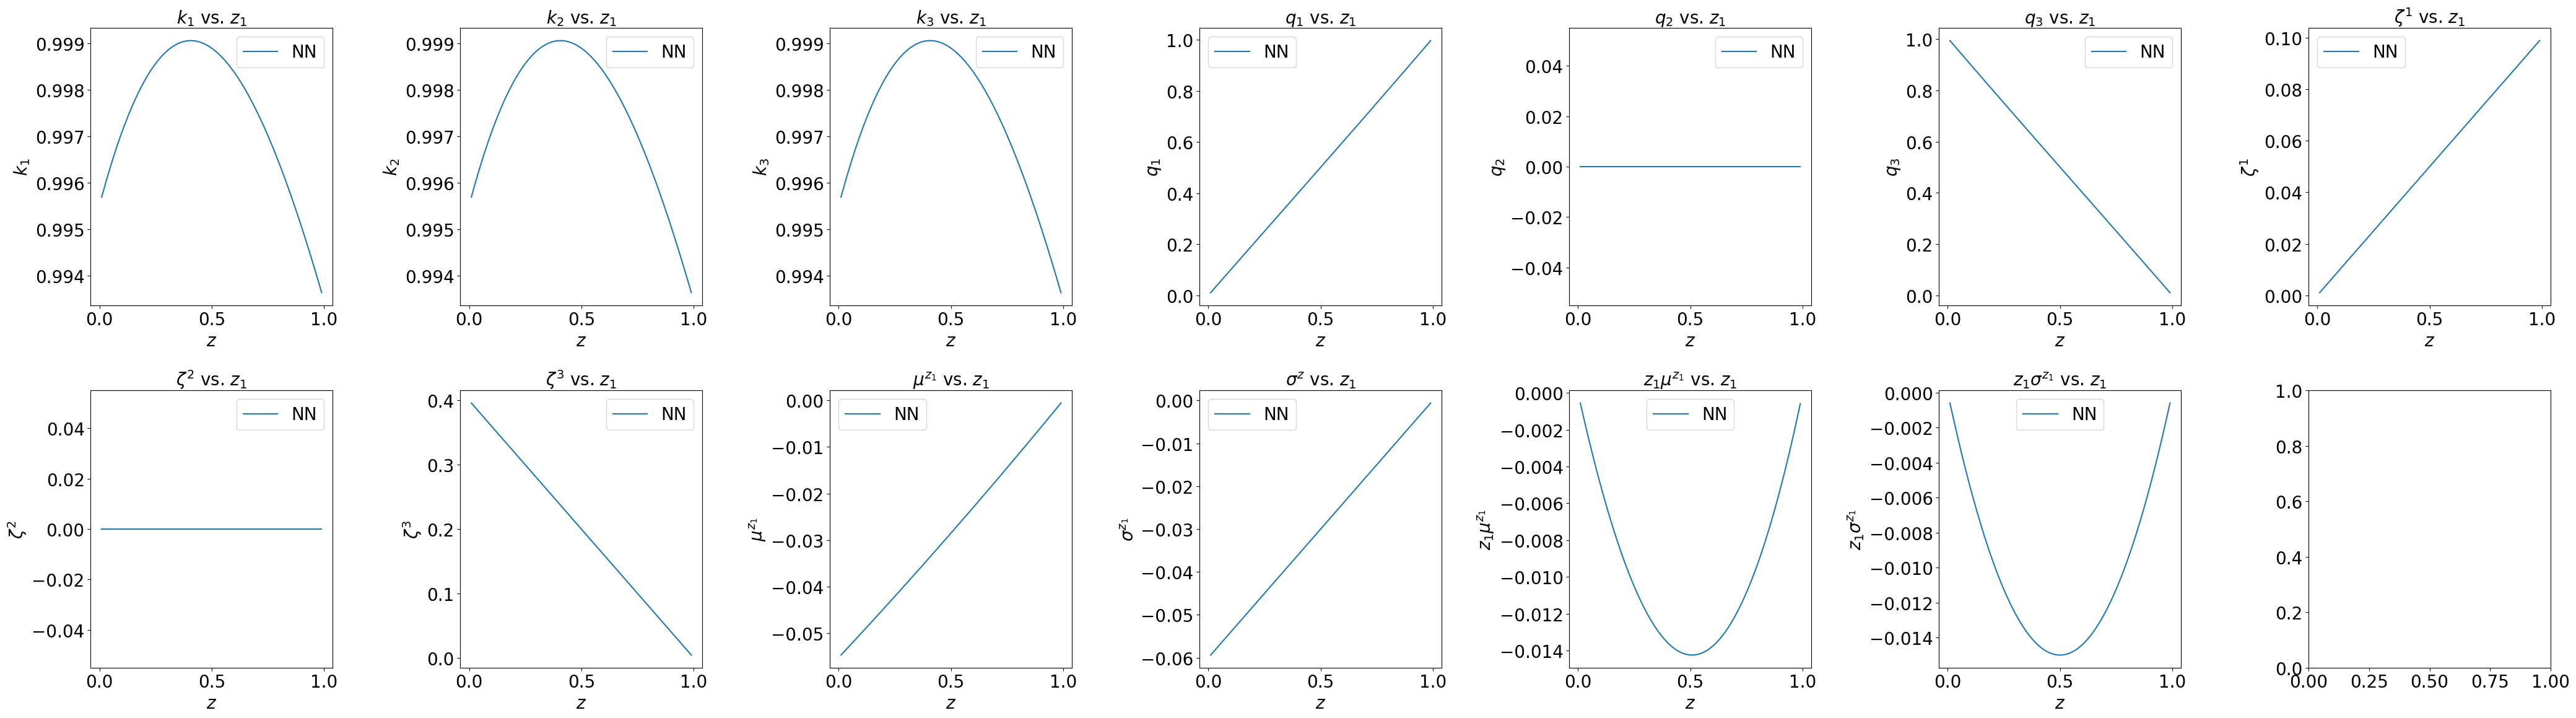

In [4]:
N = 100
SV = torch.zeros((N, 3), device=model.device)
SV[:, 0] = torch.linspace(0.01, 0.99, N, device=model.device)
SV.requires_grad_(True)
x_plot = SV[:, 0].detach().cpu().numpy().reshape(-1)
for i, sv_name in enumerate(model.state_variables):
    model.variable_val_dict[sv_name] = SV[:, i:i+1]
model.variable_val_dict["SV"] = SV
model.update_variables(SV)
k1_nn = model.variable_val_dict["k1"].detach().cpu().numpy().reshape(-1)
k2_nn = model.variable_val_dict["k2"].detach().cpu().numpy().reshape(-1)
k3_nn = model.variable_val_dict["k3"].detach().cpu().numpy().reshape(-1)
q1_nn = model.variable_val_dict["q1"].detach().cpu().numpy().reshape(-1)
q2_nn = model.variable_val_dict["q2"].detach().cpu().numpy().reshape(-1)
q3_nn = model.variable_val_dict["q3"].detach().cpu().numpy().reshape(-1)
zeta1_nn = model.variable_val_dict["zeta1"].detach().cpu().numpy().reshape(-1)
zeta2_nn = model.variable_val_dict["zeta2"].detach().cpu().numpy().reshape(-1)
zeta3_nn = model.variable_val_dict["zeta3"].detach().cpu().numpy().reshape(-1)
muz1_nn = model.variable_val_dict["muz1"].detach().cpu().numpy().reshape(-1)
sigz1_nn = model.variable_val_dict["sigz1"].detach().cpu().numpy().reshape(-1)
muz1ari_nn = model.variable_val_dict["muz1_ari"].detach().cpu().numpy().reshape(-1)
sigz1ari_nn = model.variable_val_dict["sigz1_ari"].detach().cpu().numpy().reshape(-1)
muz2_nn = model.variable_val_dict["muz2"].detach().cpu().numpy().reshape(-1)
sigz2_nn = model.variable_val_dict["sigz2"].detach().cpu().numpy().reshape(-1)
muz2ari_nn = model.variable_val_dict["muz2_ari"].detach().cpu().numpy().reshape(-1)
sigz2ari_nn = model.variable_val_dict["sigz2_ari"].detach().cpu().numpy().reshape(-1)


xlabel = "$z$"
plot_args = [
    {"y": k1_nn, "ylabel": r"$k_1$", "title": r"$k_1$ vs. $z_1$"},
    {"y": k2_nn, "ylabel": r"$k_2$", "title": r"$k_2$ vs. $z_1$"},
    {"y": k3_nn, "ylabel": r"$k_3$", "title": r"$k_3$ vs. $z_1$"},
    {"y": q1_nn, "ylabel": r"$q_1$", "title": r"$q_1$ vs. $z_1$"},
    {"y": q2_nn, "ylabel": r"$q_2$", "title": r"$q_2$ vs. $z_1$"},
    {"y": q3_nn, "ylabel": r"$q_3$", "title": r"$q_3$ vs. $z_1$"},
    {"y": zeta1_nn, "ylabel": r"$\zeta^1$", "title": r"$\zeta^1$ vs. $z_1$"},
    {"y": zeta2_nn, "ylabel": r"$\zeta^2$", "title": r"$\zeta^2$ vs. $z_1$"},
    {"y": zeta3_nn, "ylabel": r"$\zeta^3$", "title": r"$\zeta^3$ vs. $z_1$"},
    {"y": muz1_nn, "ylabel": r"$\mu^{z_1}$", "title": r"$\mu^{z_1}$ vs. $z_1$"},
    {"y": sigz1_nn, "ylabel": r"$\sigma^{z_1}$", "title": r"$\sigma^z$ vs. $z_1$"},
    {"y": muz1ari_nn, "ylabel": r"$z_1\mu^{z_1}$", "title": r"$z_1\mu^{z_1}$ vs. $z_1$"},
    {"y": sigz1ari_nn, "ylabel": r"$z_1\sigma^{z_1}$", "title": r"$z_1\sigma^{z_1}$ vs. $z_1$"},
]

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(2, 7, figsize=(42, 12))
for i, plot_arg in enumerate(plot_args):
    row = i // 7
    col = i % 7
    curr_ax = ax[row, col]
    curr_ax.plot(x_plot, plot_arg["y"], label="NN")
    curr_ax.set_xlabel(xlabel)
    curr_ax.set_ylabel(plot_arg["ylabel"])
    curr_ax.set_title(plot_arg["title"], fontsize=20)
    curr_ax.legend()
plt.tight_layout()
plt.show()